# Exploratory Data Analysis (LLM - Detect AI Generated Text)

### Imports

In [1]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import wandb

### Reading data

In [2]:
DATA_DIR = '../data/inter'

In [3]:
train_df = pd.read_csv(os.path.join(DATA_DIR, 'train_essays.csv'))
train_df

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


In [4]:
train_df['text'][0]

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article

### Evaluating data

The data used is available followinf this link: https://www.kaggle.com/datasets/thedrcat/daigt-proper-train-dataset/?select=train_drcat_04.csv

In [5]:
train_df.generated.value_counts()

generated
0    1375
1       3
Name: count, dtype: int64

In [6]:
train_df[train_df["generated"] == 1].id

704     82131f68
740     86fe4f18
1262    eafb8a56
Name: id, dtype: object

Extremly unbalanced data, need to get external data (generated data)

In [7]:
train_df.prompt_id.value_counts()

prompt_id
0    708
1    670
Name: count, dtype: int64

### External data evaluation

In [8]:
external_train_df_1 = pd.read_csv(os.path.join(DATA_DIR, 'train_drcat_01.csv'))
external_train_df_1

FileNotFoundError: [Errno 2] No such file or directory: '../data/inter/train_drcat_01.csv'

In [16]:
external_train_df_1.label.value_counts()

label
0    25996
1     7263
Name: count, dtype: int64

Let use the fourth external dataset for now, it has generated text in a similar amount of our train data set

In [17]:
external_train_df_4 = pd.read_csv(os.path.join(DATA_DIR, 'train_drcat_04.csv'))
external_train_df_4

,essay_id,text,label,source,prompt,fold
0,E897534557AF,"In recent years, technology has had a profoun...",1,mistral7binstruct_v2,\nTask: Write an essay discussing the positive...,1
1,DFBA34FFE11D,Should students participate in an extracurricu...,0,persuade_corpus,NaN,2
2,af37ecf5,The electoral college is a symbol of mockery a...,0,train_essays,NaN,5
3,5EC2696BAD78,This is why I think the principle should allow...,0,persuade_corpus,NaN,8
4,llama_70b_v1843,I strongly believe that meditation and mindful...,1,llama_70b_v1,Some schools have implemented meditation and m...,0
...,...,...,...,...,...,...
44201,F7341069C4A4,"""Oh man I didn't make the soccer team!"", yelle...",0,persuade_corpus,NaN,7
44202,AFE6E553DAC2,I believe that using this technology could be ...,0,persuade_corpus,NaN,8
44203,falcon_180b_v1_600,The Face on Mars is a fascinating phenomenon t...,1,falcon_180b_v1,You have read the article 'Unmasking the Face ...,3
44204,A5F84C104693,Texting & Driving\n\nUsing your phone while dr...,0,persuade_corpus,NaN,1


In [18]:
external_train_df_4["label"].value_counts()

label
0    29792
1    14414
Name: count, dtype: int64

In [19]:
print("Total of nan prompts:", np.sum(external_train_df_4["prompt"].isna()))
print("Total of nan prompts in generated text", np.sum(external_train_df_4[external_train_df_4["label"] == 1]["prompt"].isna()))

Total of nan prompts: 31295
Total of nan prompts in generated text 3924


### Creating new train data

In [20]:
external_train_df_4 = external_train_df_4.rename(columns={"label": "generated"})

In [21]:
new_df = pd.concat([train_df[["text", "generated"]], external_train_df_4[["text", "generated"]]])
new_df

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
44201,"""Oh man I didn't make the soccer team!"", yelle...",0
44202,I believe that using this technology could be ...,0
44203,The Face on Mars is a fascinating phenomenon t...,1
44204,Texting & Driving\n\nUsing your phone while dr...,0


In [22]:
new_df.generated.value_counts()

generated
0    31167
1    14417
Name: count, dtype: int64

I believe that an undersample from here can handle it

### Weights and bias

In [17]:
with open("../wandb.json", "r") as f:
    params = json.load(f)

In [18]:
!wandb login

wandb: Currently logged in as: pedro_miguel (pedro_miguel-universidade-federal-do-rio-grande-do-norte). Use `wandb login --relogin` to force relogin


In [19]:
run = wandb.init(project=params["WANDB_PROJECT"])

Text(0, 0.5, 'Count')

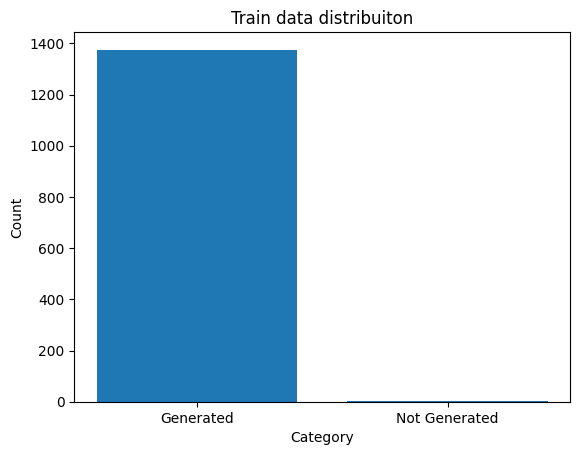

In [20]:
data = {'Generated': 1375, 'Not Generated': 3}

# Create the bar plot
fig, ax = plt.subplots()
ax.bar(data.keys(), data.values())
ax.set_title("Train data distribuiton")
ax.set_xlabel("Category")
ax.set_ylabel("Count")

In [21]:
wandb.log({"train_data_distribution": wandb.Image(fig)})

In [22]:
wandb.log({
    "dataset_analysis": wandb.Html("""
        <h3>Dataset Analysis</h3>
        <p>The dataset is <strong>extremely unbalanced</strong>. It contains 1375 samples labeled as "Generated" 
        and only 3 samples labeled as "Not Generated".</p>
        <p>To improve the model's performance and robustness, we recommend augmenting the dataset 
        or sourcing an external dataset to balance the categories.</p>
    """)
})

In [23]:
wandb.finish()